<a href="https://colab.research.google.com/github/BimaBayuUWUUU/PCVK_Ganjil_2023/blob/main/Week_10_Bima_Bayu_Saputra_2141720019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nama  : Bima Bayu Saputra
# Kelas : TI-3H
# NIM   : 2141720019
# Absen : 08

# **PRAKTIKUM PCVK WEEK 10**

## 1. Import Library

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pytesseract

import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

## 2. Load Data

In [3]:
# Load Data gradient
gradient = cv2.imread('/content/drive/MyDrive/PCVK/P10/gradient.jpg')
gradient = cv2.cvtColor(gradient, cv2.COLOR_BGR2RGB)

## 3. Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO TOZERO_INV) dengan Library

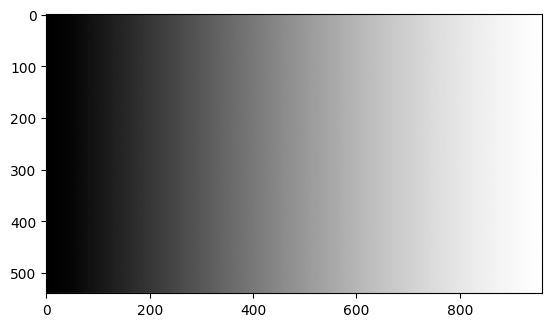

In [4]:
plt.imshow(gradient)

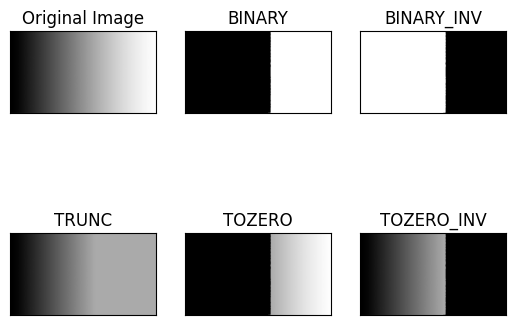

In [5]:
ret,thresh1 = cv2.threshold(gradient,170,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(gradient,170,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(gradient,170,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(gradient,170,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(gradient,170,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
gambar_gradientm4s = [gradient, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(gambar_gradientm4s[i],'gray',vmin=0,vmax=255)  # vmin vmax untuk mengatur jangkauan intensitas piksel
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([]) # menyembunyikan label sumbu x dan sumbu y

plt.show()

## 4. Otsu's Thresholding

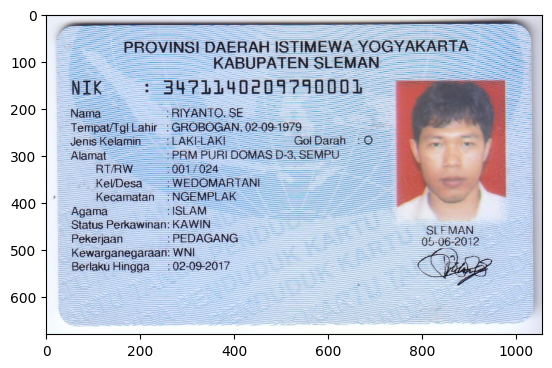

In [6]:
ktp = cv2.imread('/content/drive/MyDrive/PCVK/P7/KTP/ktp.png')
ktp = cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB)

plt.imshow(ktp)

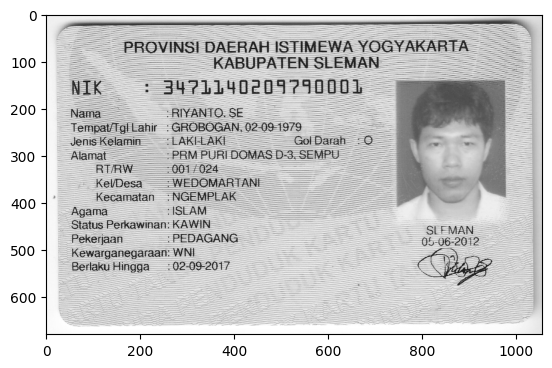

In [7]:
# Ubah citra ke grayscale dengan library
ktp_gray = cv2.imread('/content/drive/MyDrive/PCVK/P7/KTP/ktp.png',0)
plt.imshow(ktp_gray, cmap='gray')

167


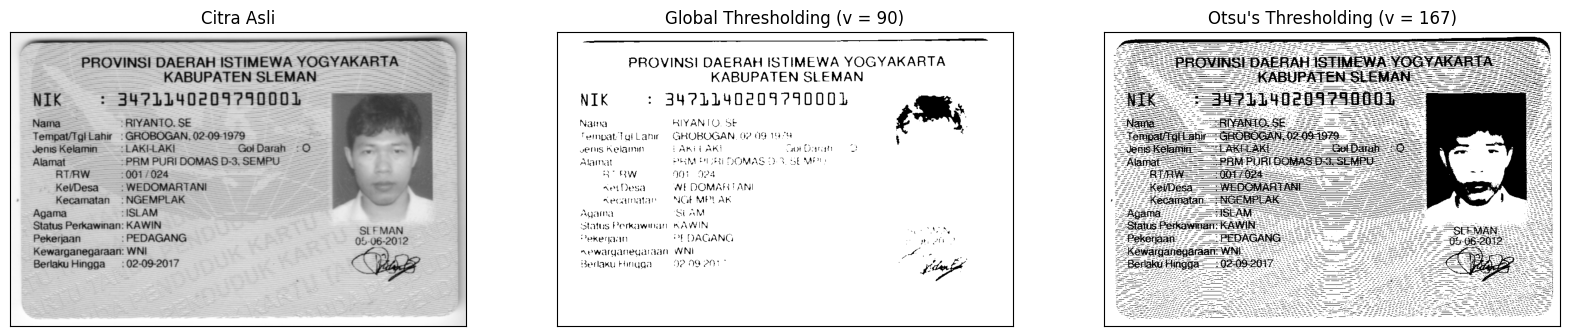

In [8]:
filename = ('/content/drive/MyDrive/PCVK/P7/KTP/ktp.png')
img = cv2.imread(filename,0)
blur = cv2.GaussianBlur(img,(5,5),0)

def otsu(gray):
  pixel_number = gray.shape[0] * gray.shape[1]
  mean_weight = 1.0/pixel_number
  his, bins = np.histogram(gray, np.arange(0,257))
  final_thresh = -1
  final_value = -1
  intensity_arr = np.arange(256)

  for t in bins[1:-1]: # This goes from 1 to 254 uint8 range (Pretty sure wont be those values)
    pcb = np.sum(his[:t])
    pcf = np.sum(his[t:])
    Wb = pcb * mean_weight
    Wf = pcf * mean_weight
    mub = np.sum(intensity_arr[:t]*his[:t]) / float(pcb)
    muf = np.sum(intensity_arr[t:]*his[t:]) / float(pcf)
    #print mub, muf
    value = Wb * Wf * (mub - muf) ** 2

    if value > final_value:
      final_thresh = t
      final_value = value
  final_img = gray.copy()
  print(final_thresh)
  final_img[gray > final_thresh] = 255
  final_img[gray < final_thresh] = 0
  return final_img, final_thresh

otsu_biner, otsu_thresh = otsu(img)
x = ("Otsu's Thresholding (v = ")+str(otsu_thresh)+")"
ret,th1 = cv2.threshold(blur,90,255,cv2.THRESH_BINARY)
#ret,th2 = cv2.threshold(blur,thresh,255,cv2.THRESH_BINARY)
titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [blur, th1, otsu_biner]
plt.figure(figsize = (20,15))

for i in range(len(citra3)):
  plt.subplot(1,3,i+1),plt.imshow(citra3[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()


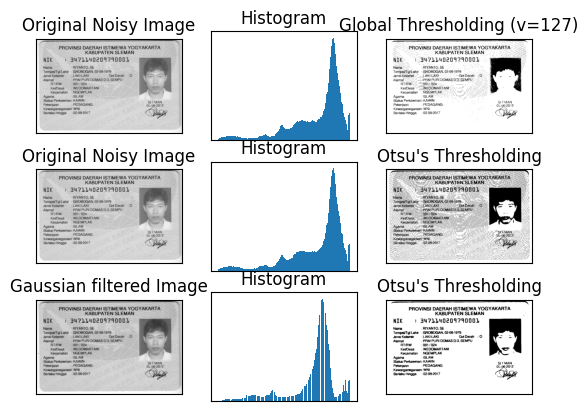

In [9]:
# global thresholding
global_threshold,th1 = cv2.threshold(ktp_gray,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
otsu_threshold,th2 = cv2.threshold(ktp_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(ktp_gray,(5,5),0)
otsu_gaussian,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [ktp_gray, 0, th1,
          ktp_gray, 0, th2,
          blur, 0, th3]

titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])

plt.show()

## 5. Histogram dari Citra Tersegmentasi (Histogram Foreground saja)

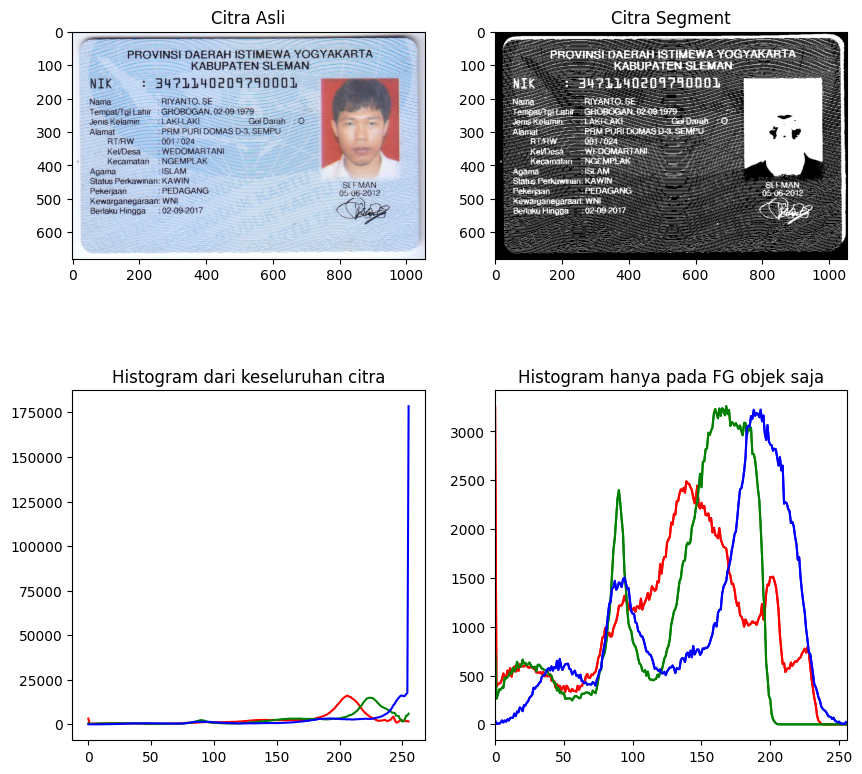

In [10]:
ktp = ('/content/drive/MyDrive/PCVK/P7/KTP/ktp.png')
img_l = cv2.imread(ktp)
img_rgb = cv2.cvtColor(img_l,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)

ret3,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv2.calcHist([img_rgb],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])

plt.show()

## 6. Segmentasi Warna pada image 'ktp_riyanto.png'. Munculkan warna biru saja. (K-Means)

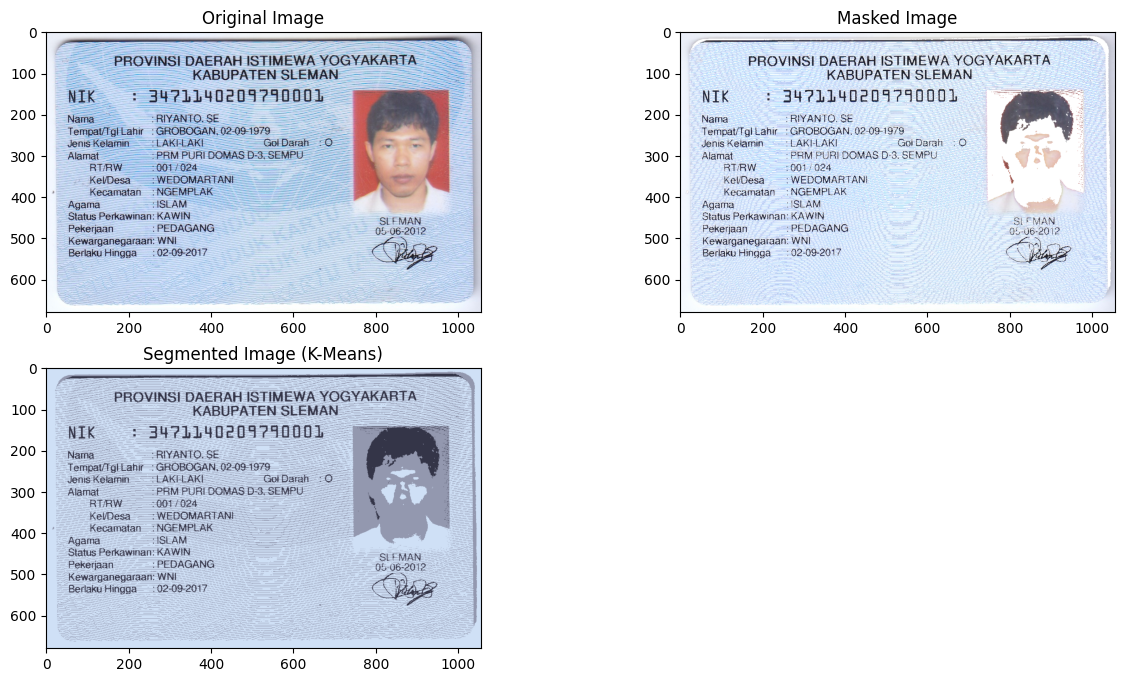

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
ktp = '/content/drive/MyDrive/PCVK/P7/KTP/ktp.png'
img = cv2.imread(ktp)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Flatten the pixel values
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define the criteria and the number of clusters (k)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3# Number of clusters

# Apply K-Means clustering
# K-Means dari library openCV
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the centers to integers
centers = np.uint8(centers)

# Flatten the labels array
labels = labels.flatten()

# Create a masked image by turning one cluster into white
masked_image = np.copy(img)
masked_image = masked_image.reshape((-1, 3))
cluster_to_white = 2
masked_image[labels == cluster_to_white] = [255, 255, 255]
masked_image = masked_image.reshape(img.shape)

# Convert the segmented image back to the original shape
segmented_image = centers[labels].reshape(img.shape)

# Display the original image, segmented image, and masked image
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1), plt.imshow(img)
plt.title('Original Image')

plt.subplot(2, 2, 2), plt.imshow(masked_image)
plt.title('Masked Image')

plt.subplot(2, 2, 3), plt.imshow(segmented_image)
plt.title('Segmented Image (K-Means)')

plt.show()

---
# **Tugas implementasi citra dengan Otsu Thresholding + K-means dan hasil ekstrak teks dari KTP**
---

In [18]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-ind is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


## **Otsu's**

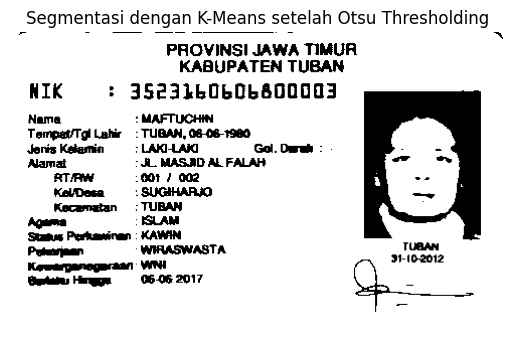


Hasil Ekstrak Teks dari Segmentasi KMeans

PROVINSI JAWA TIMUR

KABUPATEN TUBAN
NIK : 3523450504800003
Nama 2 MAFTUCHN
TempatTgl Lahir : TUBAN, 06-06-1900
dori Kelamin: LAKI-LAKI Gol. Darah
amat JL. MASAD AL FALAH
ATAW 601 1 002 M
Kel/Dasa SUGIHARYO 3
Kecamatan TUBAN
Kama ISLAM
Satu Pertamiran : KAWIN
Pekerjaan WIRASWASTA
Keweranogarsan WNI

|

.
Jen
Ta Boa oa



In [30]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pytesseract

# Baca citra KTP
ktp_img = cv2.imread('/content/drive/MyDrive/PCVK/P7/KTP/ktp3.png')
ktp_gray = cv2.cvtColor(ktp_img, cv2.COLOR_BGR2GRAY)

# Otsu's thresholding pada citra
_, otsu_thresholded = cv2.threshold(ktp_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Konversi citra ke tipe float32
image_2d = np.float32(otsu_thresholded)

# Reshape citra ke 1 kolom dan banyak baris
image_2d = image_2d.reshape((-1, 1))

# Definisikan kriteria berhenti untuk KMeans
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Jumlah cluster yang diinginkan
k = 2

# Jalankan algoritma KMeans
_, labels, centers = cv2.kmeans(image_2d, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Konversi kembali ke tipe uint8 dan ubah ukuran ke ukuran citra asli
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
segmented_image = segmented_data.reshape(otsu_thresholded.shape)

# Tampilkan hasil KMeans segmentation
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmentasi dengan K-Means setelah Otsu Thresholding')
plt.axis('off')
plt.show()

# Ekstrak teks dari citra hasil segmentasi KMeans
extracted_text = pytesseract.image_to_string(segmented_image, lang="ind")

# Tampilkan teks yang diekstrak
print("\nHasil Ekstrak Teks dari Segmentasi KMeans\n\n" + extracted_text)

## **GaussianBlur**

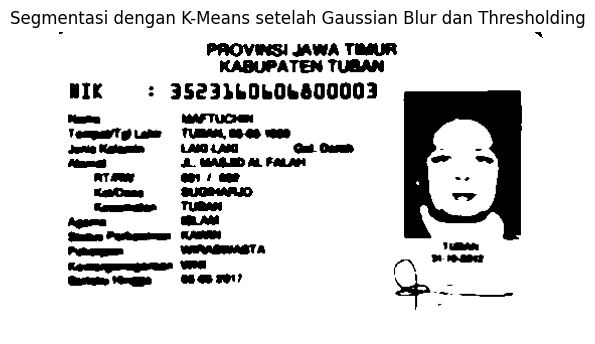


Hasil Ekstrak Teks dari Segmentasi KMeans

PROVINSI JAWA TIMUR
KABUPATEN TUBAN

NIK : 3523)40504800003

—— Tuan
Tempat Lahu TAMA, 29-69 YON

Jana Kalasan MO LAI 0. Oaan
mat J. MAIID AL FALAN

— -.—

IunOang —— SUGMAANO

Kemnatan TUBAN
€..m. -—
1ana Peteaan KAIN
— WnsmuaTA
0mgangnan Da



In [32]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pytesseract

# Baca citra KTP
ktp_img = cv2.imread('/content/drive/MyDrive/PCVK/P7/KTP/ktp3.png')
ktp_gray = cv2.cvtColor(ktp_img, cv2.COLOR_BGR2GRAY)

# Menggunakan Gaussian Blur untuk mengurangi noise
blurred_img = cv2.GaussianBlur(ktp_gray, (5, 5), 0)

# Terapkan thresholding pada citra yang telah di-blur
_, gaussian_thresholded = cv2.threshold(blurred_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Konversi citra ke tipe float32
image_2d = np.float32(gaussian_thresholded)

# Reshape citra ke 1 kolom dan banyak baris
image_2d = image_2d.reshape((-1, 1))

# Definisikan kriteria berhenti untuk KMeans
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Jumlah cluster yang diinginkan
k = 2

# Jalankan algoritma KMeans
_, labels, centers = cv2.kmeans(image_2d, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Konversi kembali ke tipe uint8 dan ubah ukuran ke ukuran citra asli
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
segmented_image = segmented_data.reshape(gaussian_thresholded.shape)

# Tampilkan hasil KMeans segmentation
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmentasi dengan K-Means setelah Gaussian Blur dan Thresholding')
plt.axis('off')
plt.show()

# Ekstrak teks dari citra hasil segmentasi KMeans
extracted_text = pytesseract.image_to_string(segmented_image, lang="ind")

# Tampilkan teks yang diekstrak
print("\nHasil Ekstrak Teks dari Segmentasi KMeans\n\n" + extracted_text)

## **Global**

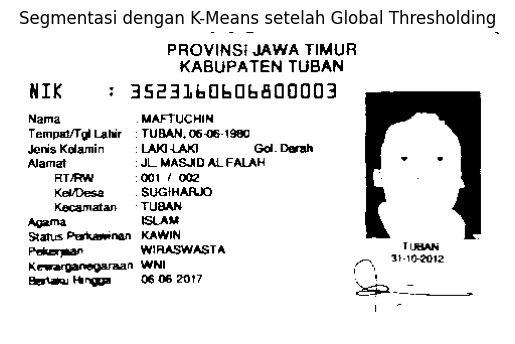


Hasil Ekstrak Teks dari Segmentasi KMeans setelah Global Thresholding

PROVINSI JAWA TIMUR
KABUPATEN TUBAN

NIK 1 45823160k4048400003

Nama MAFTUCHIN

Tempat/Tgl Lahir : TUBAN, 06-06-1920

Jenis Kolartin LAI Gal. Darah

Wamat JL MASAD AL FALAH To
RTRW 001 1 002

KelDesa —- SUGIHARJO
Kecamatan "TUBAN

Agama ISLAM
Status Perkawnan KAWIN
Pekerman WIRASWASTA

Kewarganegaraan WNI
Batara tangga 06 06 2017

 



In [34]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pytesseract

# Baca citra KTP
ktp_img = cv2.imread('/content/drive/MyDrive/PCVK/P7/KTP/ktp3.png')
ktp_gray = cv2.cvtColor(ktp_img, cv2.COLOR_BGR2GRAY)

# Terapkan thresholding global
_, global_thresholded = cv2.threshold(ktp_gray, 127, 255, cv2.THRESH_BINARY)

# Konversi citra ke tipe float32
image_2d = np.float32(global_thresholded)

# Reshape citra ke 1 kolom dan banyak baris
image_2d = image_2d.reshape((-1, 1))

# Definisikan kriteria berhenti untuk KMeans
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Jumlah cluster yang diinginkan
k = 2

# Jalankan algoritma KMeans
_, labels, centers = cv2.kmeans(image_2d, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Konversi kembali ke tipe uint8 dan ubah ukuran ke ukuran citra asli
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
segmented_image = segmented_data.reshape(global_thresholded.shape)

# Tampilkan hasil KMeans segmentation setelah thresholding global
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmentasi dengan K-Means setelah Global Thresholding')
plt.axis('off')
plt.show()

# Ekstrak teks dari citra hasil segmentasi KMeans
extracted_text = pytesseract.image_to_string(segmented_image, lang="ind")

# Tampilkan teks yang diekstrak
print("\nHasil Ekstrak Teks dari Segmentasi KMeans setelah Global Thresholding\n\n" + extracted_text)
